In [4]:
# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import truncnorm, norm
import time

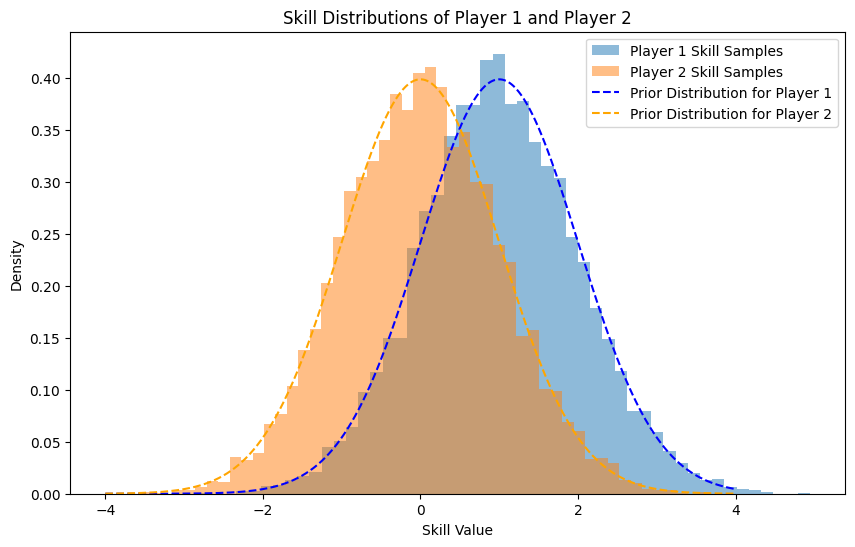

Probability of Player 1 winning (P(y=1)): 0.7636


In [ ]:
# Q3: Numerical validation of derived distributions

mu_1 = 1
mu_2 = 0
sigma_1 = 1
sigma_2 = 1
sigma_t = 1
n_samples = 10000

# function for the conditional distribution of the outcome given the skills
def conditional_distribution_outcome(t, s1, s2, y, sigma_t):
    t_mean = s1 - s2
    if y == 1:
        return stats.truncnorm.pdf(t, a=(0 - t_mean) / sigma_t, b=np.inf, loc=t_mean, scale=sigma_t)
    elif y == -1:
        return stats.truncnorm.pdf(t, a=-np.inf, b=(0 - t_mean) / sigma_t, loc=t_mean, scale=sigma_t)

# function for the posterior distribution of the skills given the outcome
def posterior_distribution(s1, s2, t, y, sigma_t, mu_1, mu_2, sigma_1, sigma_2):
    p_s1 = stats.norm.pdf(s1, mu_1, sigma_1)
    p_s2 = stats.norm.pdf(s2, mu_2, sigma_2)
    p_t_given_s1_s2 = conditional_distribution_outcome(t, s1, s2, y, sigma_t)
    return p_t_given_s1_s2 * p_s1 * p_s2

# function to calculate the probability of player 1 winning
def probability_player_1_wins(mu_1, mu_2, sigma_1, sigma_2, sigma_t):
    s1_samples = np.random.normal(mu_1, sigma_1, n_samples)
    s2_samples = np.random.normal(mu_2, sigma_2, n_samples)
    t_samples = s1_samples - s2_samples
    y_samples = (t_samples > 0).astype(int)
    return np.mean(y_samples == 1)

# generate samples and calculate probabilities
s1_samples = np.random.normal(mu_1, sigma_1, n_samples)
s2_samples = np.random.normal(mu_2, sigma_2, n_samples)
y = 1
t_values = s1_samples - s2_samples
conditional_probs = [conditional_distribution_outcome(t, s1, s2, y, sigma_t) for s1, s2, t in zip(s1_samples, s2_samples, t_values)]
posterior_probs = np.array([posterior_distribution(s1, s2, t, y, sigma_t, mu_1, mu_2, sigma_1, sigma_2) for s1, s2, t in zip(s1_samples, s2_samples, t_values)])
posterior_probs /= np.sum(posterior_probs)
p_y_1 = probability_player_1_wins(mu_1, mu_2, sigma_1, sigma_2, sigma_t)

plt.figure(figsize=(10, 6))
n_bins = 50
plt.hist(s1_samples, bins=n_bins, alpha=0.5, label="Player 1 Skill Samples", density=True)
plt.hist(s2_samples, bins=n_bins, alpha=0.5, label="Player 2 Skill Samples", density=True)
x = np.linspace(-4, 4, 1000)
prior_s1 = stats.norm.pdf(x, mu_1, sigma_1)
prior_s2 = stats.norm.pdf(x, mu_2, sigma_2)
plt.plot(x, prior_s1, label="Prior Distribution for Player 1", color='blue', linestyle='--')
plt.plot(x, prior_s2, label="Prior Distribution for Player 2", color='orange', linestyle='--')
plt.title("Skill Distributions of Player 1 and Player 2")
plt.xlabel("Skill Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"Probability of Player 1 winning (P(y=1)): {p_y_1}")


In [20]:
# print mean of posterior distributions of the skill levels
post_s1 = np.sum(posterior_probs * s1_samples) / np.sum(posterior_probs)
post_s2 = np.sum(posterior_probs * s2_samples) / np.sum(posterior_probs)
print(f"Posterior mean for Player 1: {post_s1}")
print(f"Posterior mean for Player 2: {post_s2}")

Posterior mean for Player 1: 1.1533428847335614
Posterior mean for Player 2: -0.13480679916795946


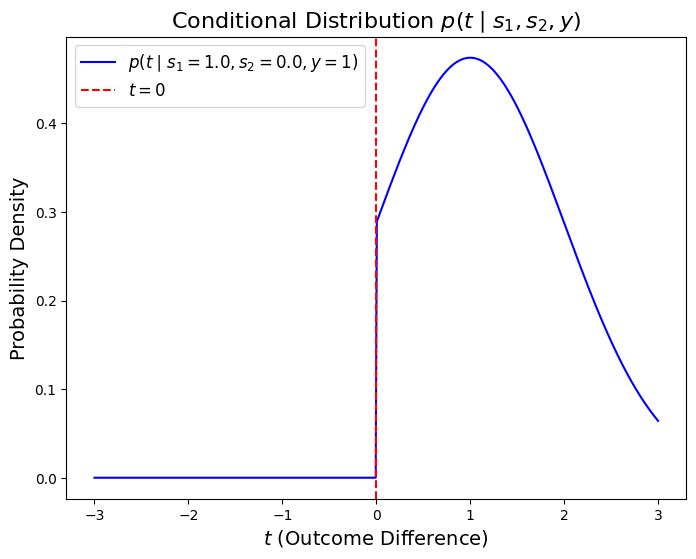

In [25]:
# visualize conditional distribution of the outcome

s1_fixed = 1.0
s2_fixed = 0.0
y_fixed = 1 # player 1 wins

t_values = np.linspace(-3, 3, 500)

# Compute p(t | s1, s2, y) for each t value
p_t_given_s1_s2 = [conditional_distribution_outcome(t, s1_fixed, s2_fixed, y_fixed, sigma_t) for t in t_values]

plt.figure(figsize=(8, 6))
plt.plot(t_values, p_t_given_s1_s2, label=f"$p(t \mid s_1={s1_fixed}, s_2={s2_fixed}, y={y_fixed})$", color='blue')
plt.title("Conditional Distribution $p(t \mid s_1, s_2, y)$", fontsize=16)
plt.xlabel("$t$ (Outcome Difference)", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.axvline(x=0, color='red', linestyle='--', label="$t = 0$")
plt.legend(fontsize=12)

Posterior mean for s1: 1.2705766687551168, s2: -0.2213302676008766


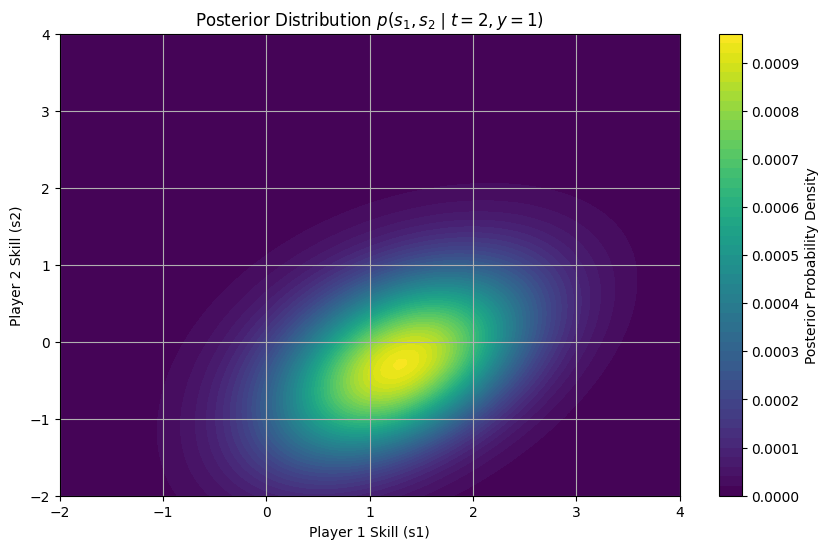

In [ ]:
# plot gaussian distribution for the posterior distribution of skills

mu_1 = 1
mu_2 = 0
sigma_1 = 1
sigma_2 = 1
sigma_t = 1
n_samples = 10000

# conditional distribution of the outcome
def conditional_distribution_outcome(t, s1, s2, y, sigma_t):
    t_mean = s1 - s2
    if y == 1:  # Player 1 wins (t > 0)
        return stats.truncnorm.pdf(t, a=(0 - t_mean) / sigma_t, b=np.inf, loc=t_mean, scale=sigma_t)
    elif y == -1:  # Player 2 wins (t <= 0)
        return stats.truncnorm.pdf(t, a=-np.inf, b=(0 - t_mean) / sigma_t, loc=t_mean, scale=sigma_t)

# posterior distribution of skills
def posterior_distribution(s1, s2, t, y, sigma_t, mu_1, mu_2, sigma_1, sigma_2):
    p_s1 = stats.norm.pdf(s1, mu_1, sigma_1)
    p_s2 = stats.norm.pdf(s2, mu_2, sigma_2)
    p_t_given_s1_s2 = conditional_distribution_outcome(t, s1, s2, y, sigma_t)

    return p_t_given_s1_s2 * p_s1 * p_s2

s1_range = np.linspace(-2, 4, 100)
s2_range = np.linspace(-2, 4, 100)
s1_grid, s2_grid = np.meshgrid(s1_range, s2_range)

y = 1  # player 1 wins
t_fixed = 2  # fix t for visualization

# compute the posterior dist value over the grid
posterior_grid = np.zeros_like(s1_grid)
for i in range(s1_grid.shape[0]):
    for j in range(s1_grid.shape[1]):
        s1 = s1_grid[i, j]
        s2 = s2_grid[i, j]
        posterior_grid[i, j] = posterior_distribution(s1, s2, t_fixed, y, sigma_t, mu_1, mu_2, sigma_1, sigma_2)
posterior_grid /= np.sum(posterior_grid)

plt.figure(figsize=(10, 6))
plt.contourf(s1_grid, s2_grid, posterior_grid, levels=50, cmap="viridis")
plt.colorbar(label="Posterior Probability Density")
plt.xlabel("Player 1 Skill (s1)")
plt.ylabel("Player 2 Skill (s2)")
plt.title(f"Posterior Distribution $p(s_1, s_2 \\mid t={t_fixed}, y={y})$")
plt.grid(True)

posterior_mean_s1 = np.sum(s1_grid * posterior_grid) / np.sum(posterior_grid)
posterior_mean_s2 = np.sum(s2_grid * posterior_grid) / np.sum(posterior_grid)
print(f"Posterior mean for s1: {posterior_mean_s1}, s2: {posterior_mean_s2}")


Mean of Player 1 Skill (s1): 1.333988411151252
Mean of Player 2 Skill (s2): -0.33200719643068366


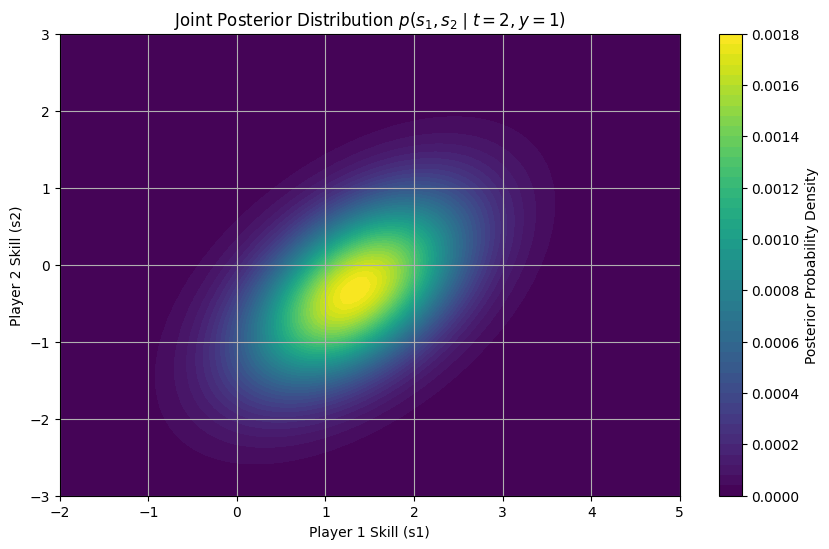

In [ ]:
# plot derived posterior distribution of skills

mu_1 = 1
mu_2 = 0
sigma_1 = 1
sigma_2 = 1
sigma_t = 1
t_obs = 2
def posterior_unnormalized(s1, s2, t, mu_1, mu_2, sigma_1, sigma_2, sigma_t):
    term1 = -((t - (s1 - s2))**2) / (2 * sigma_t**2)
    term2 = -((s1 - mu_1)**2) / (2 * sigma_1**2)
    term3 = -((s2 - mu_2)**2) / (2 * sigma_2**2)
    return np.exp(term1 + term2 + term3)

# create grid of s1 and s2 values ovr which to evaluate posterior
s1_range = np.linspace(-3, 5, 100)
s2_range = np.linspace(-3, 5, 100)
s1_grid, s2_grid = np.meshgrid(s1_range, s2_range)

posterior_grid = posterior_unnormalized(s1_grid, s2_grid, t_obs, mu_1, mu_2, sigma_1, sigma_2, sigma_t)
posterior_grid /= np.sum(posterior_grid)

mean_s1 = np.sum(s1_grid * posterior_grid)
mean_s2 = np.sum(s2_grid * posterior_grid)

print(f"Mean of Player 1 Skill (s1): {mean_s1}")
print(f"Mean of Player 2 Skill (s2): {mean_s2}")

plt.figure(figsize=(10, 6))
plt.contourf(s1_grid, s2_grid, posterior_grid, levels=50, cmap="viridis")
plt.colorbar(label="Posterior Probability Density")
plt.xlabel("Player 1 Skill (s1)")
plt.ylabel("Player 2 Skill (s2)")
plt.title(f"Joint Posterior Distribution $p(s_1, s_2 \\mid t={t_obs}, y=1)$")
plt.xlim(-2, 5)
plt.ylim(-3, 3)
plt.grid(True)

Estimated mean skill of Player 1 (s1): 1.3361
Estimated mean skill of Player 2 (s2): -0.3307


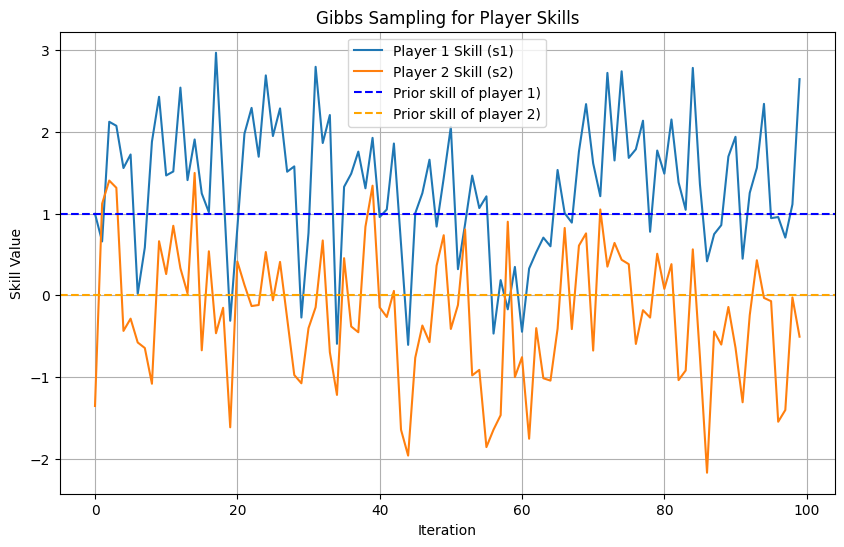

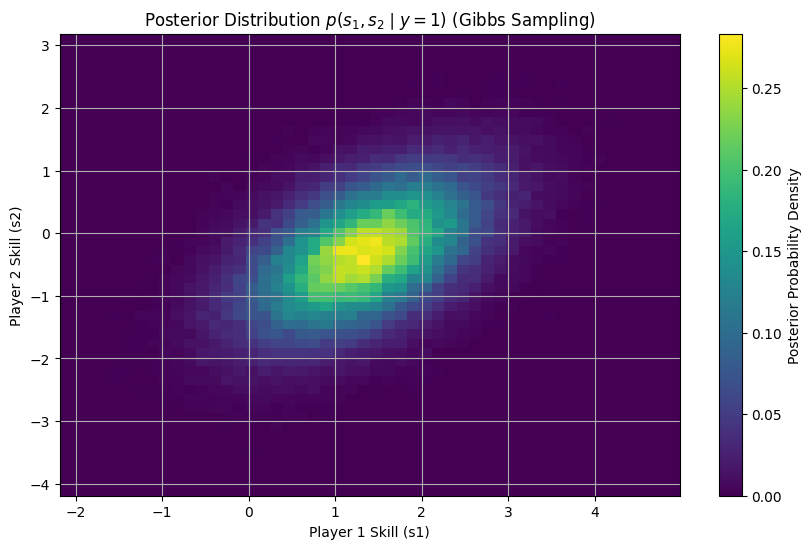

In [ ]:
# Gibbs sampler for joint skill dist. trace plot and histogram of samples

mu_1 = 1
mu_2 = 0
sigma_1 = 1
sigma_2 = 1
sigma_t = 1
n_samples = 100000  # number of Gibbs samples to draw
burn_in = 1000


# conditional distribution skill 1 given skill 2 and outcome
def sample_s1_given_s2(s2, t_obs, mu_1, sigma_1, sigma_t):
    mean_s1 = (t_obs + s2) * (sigma_1**2 / (sigma_1**2 + sigma_t**2)) + mu_1 * (sigma_t**2 / (sigma_1**2 + sigma_t**2))
    var_s1 = (sigma_1**2 * sigma_t**2) / (sigma_1**2 + sigma_t**2)
    return np.random.normal(mean_s1, np.sqrt(var_s1))

# the other conditional distribution, this time for s2
def sample_s2_given_s1(s1, t_obs, mu_2, sigma_2, sigma_t):
    mean_s2 = (s1 - t_obs) * (sigma_2**2 / (sigma_2**2 + sigma_t**2)) + mu_2 * (sigma_t**2 / (sigma_2**2 + sigma_t**2))
    var_s2 = (sigma_2**2 * sigma_t**2) / (sigma_2**2 + sigma_t**2)
    return np.random.normal(mean_s2, np.sqrt(var_s2))

y = 1  # player 1 wins
t_obs = 2  # observed difference between skills


s1_samples = np.zeros(n_samples)
s2_samples = np.zeros(n_samples)
s1_current = np.random.normal(mu_1, sigma_1)
s2_current = np.random.normal(mu_2, sigma_2)

for i in range(n_samples):

    # sample s1
    s1_current = sample_s1_given_s2(s2_current, t_obs, mu_1, sigma_1, sigma_t)

    # sample s2
    s2_current = sample_s2_given_s1(s1_current, t_obs, mu_2, sigma_2, sigma_t)
   
    s1_samples[i] = s1_current
    s2_samples[i] = s2_current


plt.figure(figsize=(10, 6))
plt.plot(s1_samples[:100], label="Player 1 Skill (s1)")
plt.plot(s2_samples[:100], label="Player 2 Skill (s2)")
plt.axhline(y=mu_1, color='blue', linestyle='--', label="Prior skill of player 1)")
plt.axhline(y=mu_2, color='orange', linestyle='--', label="Prior skill of player 2)")
plt.title("Gibbs Sampling for Player Skills")
plt.xlabel("Iteration")
plt.ylabel("Skill Value")
plt.legend()
plt.grid(True)

# # remove burn-in period
s1_samples = s1_samples[burn_in:]
s2_samples = s2_samples[burn_in:]

plt.figure(figsize=(10, 6))
plt.hist2d(s1_samples, s2_samples, bins=50, cmap="viridis", density=True)
plt.colorbar(label="Posterior Probability Density")
plt.xlabel("Player 1 Skill (s1)")
plt.ylabel("Player 2 Skill (s2)")
plt.title("Posterior Distribution $p(s_1, s_2 \\mid y=1)$ (Gibbs Sampling)")
# plt.xlim(-3, 3)
# plt.ylim(-3, 3)
plt.grid(True)

print(f"Estimated mean skill of Player 1 (s1): {np.mean(s1_samples):.4f}")
print(f"Estimated mean skill of Player 2 (s2): {np.mean(s2_samples):.4f}")


Samples: 100, Time: 0.00s, Mean s1: 1.951, Error s1: 0.049, Mean s2: 0.059, Error s2: 0.059
Samples: 500, Time: 0.01s, Mean s1: 1.930, Error s1: 0.070, Mean s2: -0.042, Error s2: 0.042
Samples: 1000, Time: 0.01s, Mean s1: 2.060, Error s1: 0.060, Mean s2: 0.044, Error s2: 0.044
Samples: 5000, Time: 0.06s, Mean s1: 2.014, Error s1: 0.014, Mean s2: 0.019, Error s2: 0.019
Samples: 10000, Time: 0.09s, Mean s1: 2.016, Error s1: 0.016, Mean s2: 0.010, Error s2: 0.010
Samples: 50000, Time: 0.51s, Mean s1: 1.999, Error s1: 0.001, Mean s2: -0.004, Error s2: 0.004
Samples: 100000, Time: 1.10s, Mean s1: 1.997, Error s1: 0.003, Mean s2: -0.001, Error s2: 0.001
Samples: 500000, Time: 9.50s, Mean s1: 2.002, Error s1: 0.002, Mean s2: 0.002, Error s2: 0.002
Samples: 1000000, Time: 9.77s, Mean s1: 1.997, Error s1: 0.003, Mean s2: -0.002, Error s2: 0.002


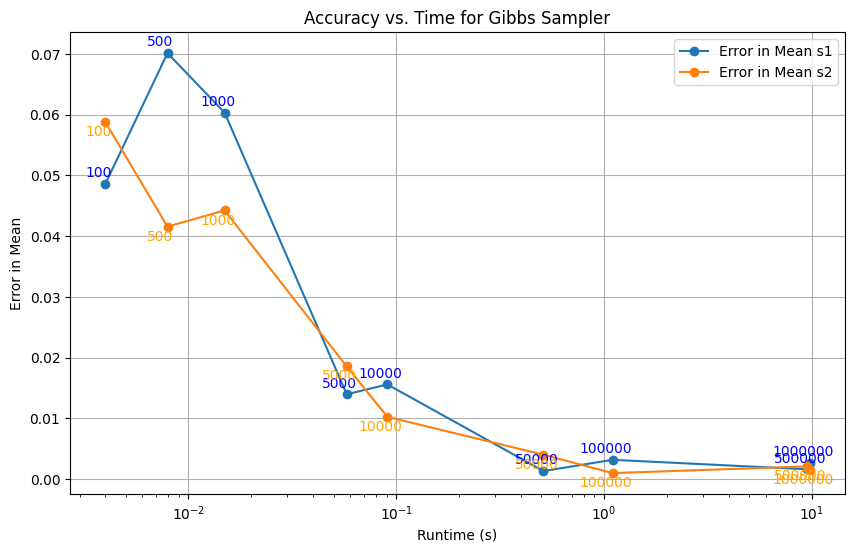

In [ ]:
# create plot of error in mean skill vs. runtime for gibbs sampler

mu_1 = 1
mu_2 = 0
sigma_1 = 1
sigma_2 = 1
sigma_t = 1
t_obs = 2
burn_in = 100


def analytical_posterior_mean(mu_1, mu_2, sigma_1, sigma_2, sigma_t, t_obs):
    return mu_1 + (t_obs * sigma_1**2) / (sigma_1**2 + sigma_t**2), \
           mu_2 - (t_obs * sigma_2**2) / (sigma_2**2 + sigma_t**2)

true_mean_s1, true_mean_s2 = analytical_posterior_mean(mu_1, mu_2, sigma_1, sigma_2, sigma_t, t_obs)



def gibbs_sampler(n_samples, burn_in):
    s1 = mu_1
    s2 = mu_2
    samples = []

    for i in range(n_samples + burn_in):
        # sample s1
        mean_s1 = mu_1 + (t_obs + s2) * (sigma_1**2) / (sigma_1**2 + sigma_t**2)
        var_s1 = 1 / (1 / sigma_1**2 + 1 / sigma_t**2)
        s1 = np.random.normal(mean_s1, np.sqrt(var_s1))

        # sample s2
        mean_s2 = mu_2 - (t_obs - s1) * (sigma_2**2) / (sigma_2**2 + sigma_t**2)
        var_s2 = 1 / (1 / sigma_2**2 + 1 / sigma_t**2)
        s2 = np.random.normal(mean_s2, np.sqrt(var_s2))

        if i >= burn_in:
            samples.append([s1, s2])

    return np.array(samples)

sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
errors_s1 = []
errors_s2 = []
times = []

for n_samples in sample_sizes:
    start_time = time.time()

    samples = gibbs_sampler(n_samples, burn_in)

    sampled_mean_s1 = np.mean(samples[:, 0])
    sampled_mean_s2 = np.mean(samples[:, 1])

    error_s1 = abs(sampled_mean_s1 - true_mean_s1)
    error_s2 = abs(sampled_mean_s2 - true_mean_s2 - 1)

    errors_s1.append(error_s1)
    errors_s2.append(error_s2)

    runtime = time.time() - start_time
    times.append(runtime)

    print(f"Samples: {n_samples}, Time: {runtime:.2f}s, "
          f"Mean s1: {sampled_mean_s1:.3f}, Error s1: {error_s1:.3f}, "
          f"Mean s2: {sampled_mean_s2:.3f}, Error s2: {error_s2:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(times, errors_s1, label="Error in Mean s1", marker='o')
plt.plot(times, errors_s2, label="Error in Mean s2", marker='o')

for i, n_samples in enumerate(sample_sizes):
    plt.annotate(f"{n_samples}", (times[i], errors_s1[i]), textcoords="offset points", xytext=(-5, 5), ha='center', fontsize=10, color='blue')
    plt.annotate(f"{n_samples}", (times[i], errors_s2[i]), textcoords="offset points", xytext=(-5, -10), ha='center', fontsize=10, color='orange')

plt.xlabel("Runtime (s)")
plt.ylabel("Error in Mean")
plt.title("Accuracy vs. Time for Gibbs Sampler")
plt.legend()
plt.grid(True)
plt.xscale('log')
# plt.yscale('log')

In [ ]:
# Q5: ADF and Gibbs sampling

# load match data
SerieA_orig = pd.read_csv('SerieA.csv')
print(SerieA_orig.size)

# skip matches that result in a draw
SerieA = SerieA_orig[SerieA_orig['score1'] != SerieA_orig['score2']]
print(SerieA.head())
print('No removed draws: ', SerieA.size - SerieA_orig.size)

2280
   yyyy-mm-dd  HH:MM     team1     team2  score1  score2
0  2018-08-18  18:00    Chievo  Juventus       2       3
1  2018-08-18  20:30     Lazio    Napoli       1       2
2  2018-08-19  18:00    Torino      Roma       0       1
3  2018-08-19  20:30  Sassuolo     Inter       1       0
5  2018-08-19  20:30    Empoli  Cagliari       2       0
No removed draws:  -648


In [204]:
# print out the team names

teams = pd.concat([SerieA['team1'], SerieA['team2']]).unique()
print(teams)

['Chievo' 'Lazio' 'Torino' 'Sassuolo' 'Empoli' 'Bologna' 'Atalanta'
 'Juventus' 'Napoli' 'Spal' 'Udinese' 'Genoa' 'Fiorentina' 'Milan' 'Parma'
 'Sampdoria' 'Inter' 'Frosinone' 'Roma' 'Cagliari']


In [216]:
# update skill distributions after each non-draw match to get rankings

sigma_t = 1
n_samples = 50000
burn_in = 100

team_skills = []
team_params = {
    'Chievo': {'mu': 0, 'sigma': 1},
    'Lazio': {'mu': 0, 'sigma': 1},
    'Torino': {'mu': 0, 'sigma': 1},
    'Sassuolo': {'mu': 0, 'sigma': 1},
    'Empoli': {'mu': 0, 'sigma': 1},
    'Bologna': {'mu': 0, 'sigma': 1},
    'Atalanta': {'mu': 0, 'sigma': 1},
    'Juventus': {'mu': 0, 'sigma': 1},
    'Napoli': {'mu': 0, 'sigma': 1},
    'Spal': {'mu': 0, 'sigma': 1},
    'Udinese': {'mu': 0, 'sigma': 1},
    'Genoa': {'mu': 0, 'sigma': 1},
    'Fiorentina': {'mu': 0, 'sigma': 1},
    'Milan': {'mu': 0, 'sigma': 1},
    'Parma': {'mu': 0, 'sigma': 1},
    'Sampdoria': {'mu': 0, 'sigma': 1},
    'Inter': {'mu': 0, 'sigma': 1},
    'Frosinone': {'mu': 0, 'sigma': 1},
    'Roma': {'mu': 0, 'sigma': 1},
    'Cagliari': {'mu': 0, 'sigma': 1}
}


def gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, score1, score2, n_samples, burn_in):
    s1 = mu_1
    s2 = mu_2
    samples = []

    for i in range(n_samples + burn_in):

        t = score1 - score2  # outcome (goal difference)

        # sample s1
        mean_s1 = mu_1 + (t + s2) * (sigma_1**2) / (sigma_1**2 + sigma_t**2)
        var_s1 = sigma_1**2 * sigma_t**2 / (sigma_1**2 + sigma_t**2)
        s1 = np.random.normal(mean_s1, np.sqrt(var_s1))

        # sample s2
        mean_s2 = mu_2 - (t - s1) * (sigma_2**2) / (sigma_2**2 + sigma_t**2)
        var_s2 = sigma_2**2 * sigma_t**2 / (sigma_2**2 + sigma_t**2)
        s2 = np.random.normal(mean_s2, np.sqrt(var_s2))

        if i >= burn_in:
            samples.append([s1, s2])

    return np.mean(samples, axis=0), np.std(samples, axis = 0)


# cycle through all matches, and update skill distributions each time
for index, row in SerieA.iterrows():

    score1 = row['score1']
    score2 = row['score2']

    team1 = row['team1']
    team2 = row['team2']

    if team1 not in team_params or team2 not in team_params:
        continue

    mu_1, sigma_1 = team_params[team1]['mu'], team_params[team1]['sigma']
    mu_2, sigma_2 = team_params[team2]['mu'], team_params[team2]['sigma']

    updated_mus, updated_sigmas = gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, score1, score2, n_samples, burn_in)
    team_skills.append(updated_mus)

    # update params
    team_params[team1]['mu'], team_params[team1]['sigma'] = updated_mus[0], updated_sigmas[0]
    team_params[team2]['mu'], team_params[team2]['sigma'] = updated_mus[1], updated_sigmas[1]
    

Juventus
Napoli
Milan
Fiorentina
Atalanta
Inter
Sampdoria
Spal
Sassuolo
Lazio
Roma
Torino
Empoli
Parma
Udinese
Cagliari
Genoa
Bologna
Chievo
Frosinone


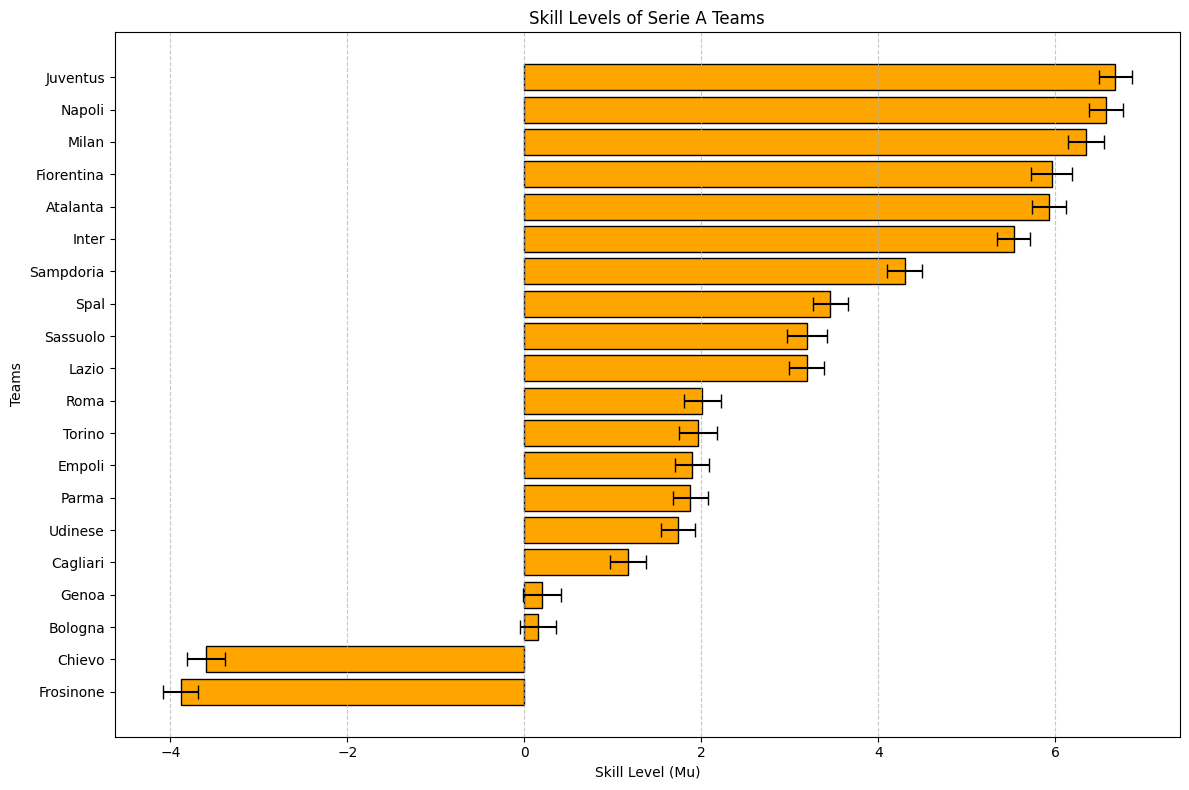

In [225]:
# create plot of rankings

# sort dict by mu
sorted_team_params = sorted(team_params.items(), key=lambda x: x[1]['mu'], reverse=True)

for team, params in sorted_team_params:
    print(f"{team}") # : mu = {params['mu']:.2f}, sigma = {params['sigma']:.2f}")
team_names = [team for team, params in sorted_team_params]
mu_values = [params['mu'] for team, params in sorted_team_params]
sigma_values = [params['sigma'] for team, params in sorted_team_params]

plt.figure(figsize=(12, 8))
plt.barh(team_names, mu_values, xerr=sigma_values, capsize=5, color='orange', edgecolor='black')
plt.xlabel("Skill Level (Mu)")
plt.ylabel("Teams")
plt.title("Skill Levels of Serie A Teams")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [221]:
# get team statistics

team_stats = {team: {"wins": 0, "matches_played": 0} for team in team_params.keys()}

for index, row in SerieA.iterrows():
    score1 = row['score1']
    score2 = row['score2']
    team1 = row['team1']
    team2 = row['team2']

    if team1 not in team_stats or team2 not in team_stats:
        continue

    team_stats[team1]['matches_played'] += 1
    team_stats[team2]['matches_played'] += 1

    if score1 > score2:
        team_stats[team1]['wins'] += 1
    elif score2 > score1:
        team_stats[team2]['wins'] += 1

# calculate win rate for each team
for team, stats in team_stats.items():
    if stats['matches_played'] > 0:
        stats['win_rate'] = stats['wins'] / stats['matches_played']
    else:
        stats['win_rate'] = 0.0

win_rate_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
win_rate_df.rename(columns={'index': 'team'}, inplace=True)
win_rate_df = win_rate_df.sort_values(by='win_rate', ascending=False)
win_rate_df

,team,wins,matches_played,win_rate
7,Juventus,28,32,0.875000
8,Napoli,24,31,0.774194
13,Milan,19,27,0.703704
2,Torino,16,23,0.695652
18,Roma,18,26,0.692308
6,Atalanta,20,29,0.689655
16,Inter,20,29,0.689655
1,Lazio,17,30,0.566667
15,Sampdoria,15,30,0.500000
3,Sassuolo,9,22,0.409091


In [228]:
# shuffle match orders and compute average team parameters

sigma_t = 1
n_samples = 50000
burn_in = 100
n_shuffles = 10

# init dict
team_params_avg = {team: {'mu': 0, 'sigma': 0} for team in team_params.keys()}

def gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, score1, score2, n_samples, burn_in):
    s1 = mu_1
    s2 = mu_2
    samples = []

    for i in range(n_samples + burn_in):

        t = score1 - score2  # outcome (goal difference)

        # sample s1
        mean_s1 = mu_1 + (t + s2) * (sigma_1**2) / (sigma_1**2 + sigma_t**2)
        var_s1 = sigma_1**2 * sigma_t**2 / (sigma_1**2 + sigma_t**2)
        s1 = np.random.normal(mean_s1, np.sqrt(var_s1))

        # sample s2
        mean_s2 = mu_2 - (t - s1) * (sigma_2**2) / (sigma_2**2 + sigma_t**2)
        var_s2 = sigma_2**2 * sigma_t**2 / (sigma_2**2 + sigma_t**2)
        s2 = np.random.normal(mean_s2, np.sqrt(var_s2))

        if i >= burn_in:
            samples.append([s1, s2])

    return np.mean(samples, axis=0), np.std(samples, axis = 0)


# loop over shuffles
for shuffle in range(n_shuffles):
    SerieA_shuffled = SerieA.sample(frac=1).reset_index(drop=True)
    
    current_team_params = {team: {'mu': 0, 'sigma': 1} for team in team_params.keys()}
    
    for index, row in SerieA_shuffled.iterrows():
        score1 = row['score1']
        score2 = row['score2']
        team1 = row['team1']
        team2 = row['team2']

        if team1 not in current_team_params or team2 not in current_team_params:
            continue

        mu_1, sigma_1 = current_team_params[team1]['mu'], current_team_params[team1]['sigma']
        mu_2, sigma_2 = current_team_params[team2]['mu'], current_team_params[team2]['sigma']

        updated_mus, updated_sigmas = gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, score1, score2, n_samples, burn_in)

        current_team_params[team1]['mu'], current_team_params[team1]['sigma'] = updated_mus[0], updated_sigmas[0]
        current_team_params[team2]['mu'], current_team_params[team2]['sigma'] = updated_mus[1], updated_sigmas[1]

    # add the mu and sigma values for averaging later
    for team, params in current_team_params.items():
        team_params_avg[team]['mu'] += params['mu']
        team_params_avg[team]['sigma'] += params['sigma']

# calculate the average team parameters
for team, params in team_params_avg.items():
    params['mu'] /= n_shuffles
    params['sigma'] /= n_shuffles

Napoli
Atalanta
Juventus
Inter
Milan
Roma
Lazio
Torino
Fiorentina
Sampdoria
Sassuolo
Bologna
Spal
Parma
Empoli
Genoa
Udinese
Cagliari
Frosinone
Chievo


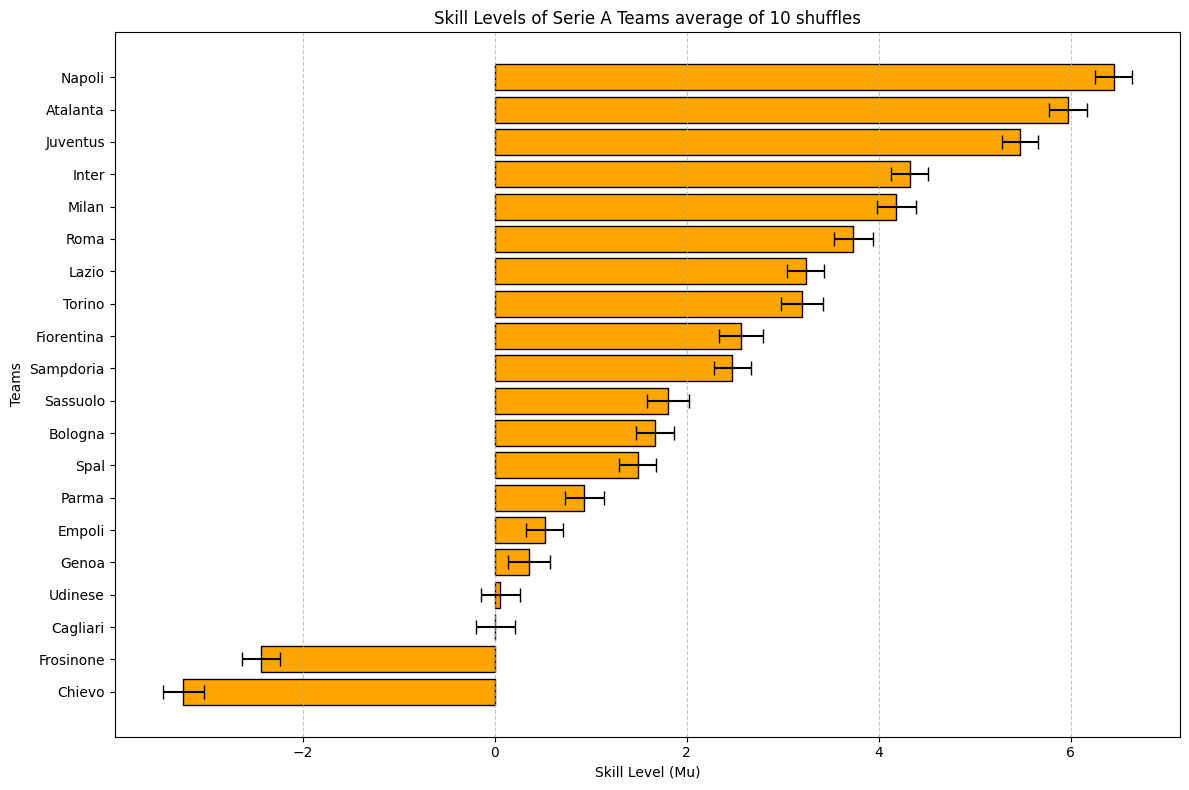

In [ ]:
# Sort ADF shuffled order by mean skill and plot

# sort by mu
sorted_team_params = sorted(team_params_avg.items(), key=lambda x: x[1]['mu'], reverse=True)

for team, params in sorted_team_params:
    print(f"{team}") #: mu = {params['mu']:.2f}, sigma = {params['sigma']:.2f}")
team_names = [team for team, params in sorted_team_params]
mu_values = [params['mu'] for team, params in sorted_team_params]
sigma_values = [params['sigma'] for team, params in sorted_team_params]

plt.figure(figsize=(12, 8))
plt.barh(team_names, mu_values, xerr=sigma_values, capsize=5, color='orange', edgecolor='black')
plt.xlabel("Skill Level (Mu)")
plt.ylabel("Teams")
plt.title(f"Skill Levels of Serie A Teams average of {n_shuffles} shuffles")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
# Q6: One-step ahead prediction

def predict_winner(mu_1, sigma_1, mu_2, sigma_2, sigma_t):
    prob_team1_wins = 1 - norm.cdf(0, loc=(mu_1 - mu_2), scale=np.sqrt(sigma_1**2 + sigma_2**2 + sigma_t**2))
    
    # predict 1 if the probability is greater than 0.5
    return +1 if prob_team1_wins > 0.5 else -1


team_params = {
    'Chievo': {'mu': 0, 'sigma': 1},
    'Lazio': {'mu': 0, 'sigma': 1},
    'Torino': {'mu': 0, 'sigma': 1},
    'Sassuolo': {'mu': 0, 'sigma': 1},
    'Empoli': {'mu': 0, 'sigma': 1},
    'Bologna': {'mu': 0, 'sigma': 1},
    'Atalanta': {'mu': 0, 'sigma': 1},
    'Juventus': {'mu': 0, 'sigma': 1},
    'Napoli': {'mu': 0, 'sigma': 1},
    'Spal': {'mu': 0, 'sigma': 1},
    'Udinese': {'mu': 0, 'sigma': 1},
    'Genoa': {'mu': 0, 'sigma': 1},
    'Fiorentina': {'mu': 0, 'sigma': 1},
    'Milan': {'mu': 0, 'sigma': 1},
    'Parma': {'mu': 0, 'sigma': 1},
    'Sampdoria': {'mu': 0, 'sigma': 1},
    'Inter': {'mu': 0, 'sigma': 1},
    'Frosinone': {'mu': 0, 'sigma': 1},
    'Roma': {'mu': 0, 'sigma': 1},
    'Cagliari': {'mu': 0, 'sigma': 1}
}

correct_predictions = 0
total_matches = 0

for index, row in SerieA.iterrows():
    score1 = row['score1']
    score2 = row['score2']
    team1 = row['team1']
    team2 = row['team2']

    if team1 not in team_params or team2 not in team_params:
        continue

    # get current skill parameters
    mu_1, sigma_1 = team_params[team1]['mu'], team_params[team1]['sigma']
    mu_2, sigma_2 = team_params[team2]['mu'], team_params[team2]['sigma']

    predicted_winner = predict_winner(mu_1, sigma_1, mu_2, sigma_2, sigma_t)

    true_winner = +1 if score1 > score2 else -1

    if predicted_winner == true_winner:
        correct_predictions += 1
    total_matches += 1

    # update skills using Gibbs sampler
    updated_mus, updated_sigmas = gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, score1, score2, n_samples, burn_in)
    team_params[team1]['mu'], team_params[team1]['sigma'] = updated_mus[0], updated_sigmas[0]
    team_params[team2]['mu'], team_params[team2]['sigma'] = updated_mus[1], updated_sigmas[1]

prediction_rate = correct_predictions / total_matches
print(f"Prediction Rate: {prediction_rate:.2f}")

Prediction Rate: 0.64
